   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


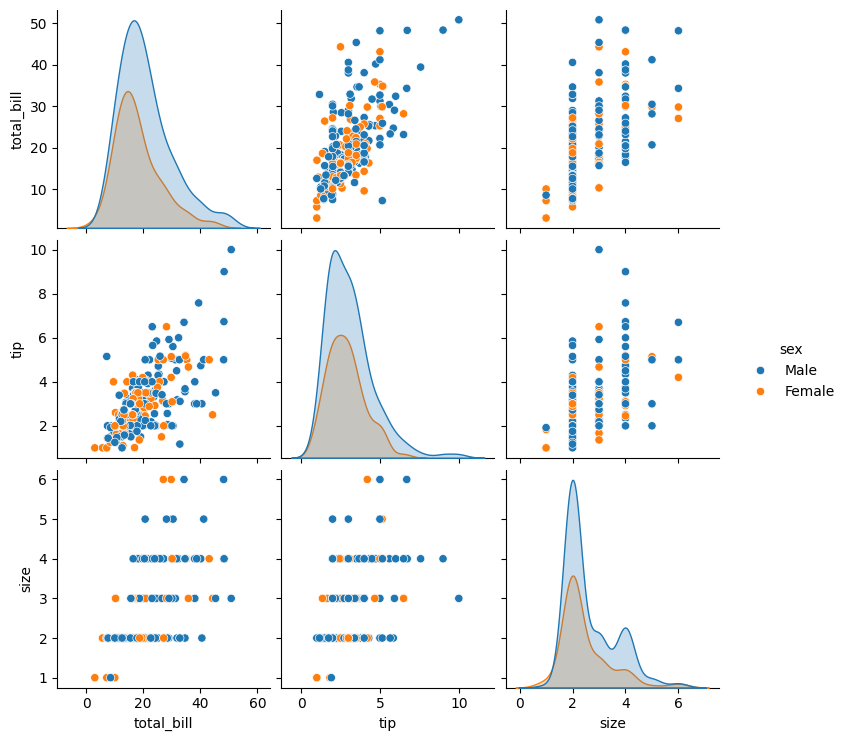

In [6]:
#exercise to go through pairplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
tips = sns.load_dataset("tips")
print(tips.head())

#pairplot to see the distribution of total bill and tip
sns.pairplot(tips, hue='sex')
plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


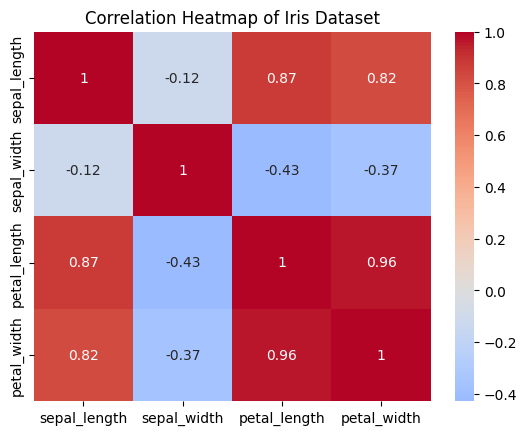

In [12]:
#use iris dataset to demonstrate heatmap
iris = sns.load_dataset("iris")
print(iris.head())
#extract the numeric columns
numeric_cols = iris.select_dtypes(include=[np.number]).columns.tolist()

#heatmap to see the correlation between numeric features
corr = iris[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


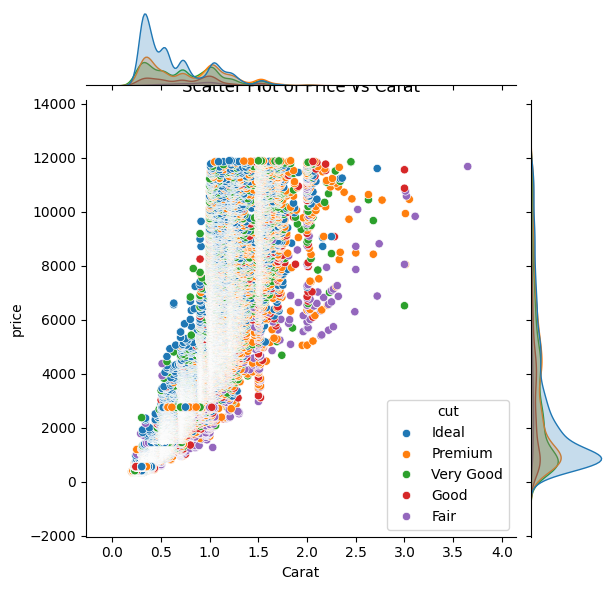

In [16]:
diamond = sns.load_dataset("diamonds")
print(diamond.head())
#remove outliers from the dataset using 1.5 IQR rule
Q1 = diamond['price'].quantile(0.25)
Q3 = diamond['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
diamond = diamond[(diamond['price'] >= lower_bound) & (diamond['price'] <= upper_bound)]
#scatter bar plot to see the distribution of price and carat
sns.jointplot(x="carat", y="price", data=diamond, kind="scatter", hue="cut")
plt.xlabel("Carat")
plt.title("Scatter Plot of Price vs Carat")
plt.show()


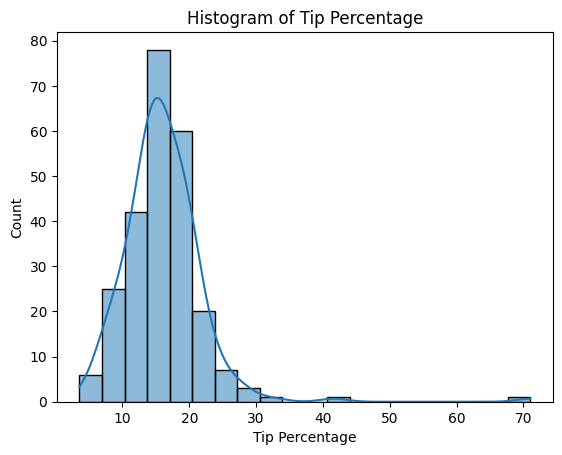

In [17]:
#histogram to see tips percentage
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100
sns.histplot(tips['tip_percentage'], bins=20, kde=True)
plt.xlabel("Tip Percentage")
plt.title("Histogram of Tip Percentage")
plt.show()

C:\Users\prate\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


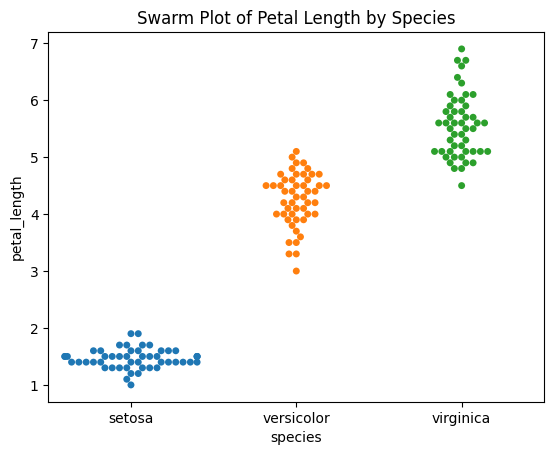

In [21]:
#swarmplot to see the distribution of petal length and width
sns.swarmplot(x="species", y="petal_length", data=iris, hue="species")
plt.title("Swarm Plot of Petal Length by Species")
plt.show()


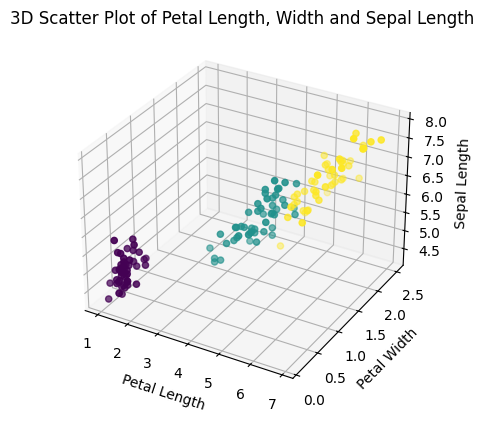

In [24]:
#3d graphs to see the distribution of petal length, width and sepal length
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['petal_length'], iris['petal_width'], iris['sepal_length'], c=iris['species'].astype('category').cat.codes, cmap='viridis')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
plt.title("3D Scatter Plot of Petal Length, Width and Sepal Length")
plt.show()
#dynamically rotate the axis of the 3d plot


In [3]:
#dynamic 3d plots for iris data set using plotly
try:
    import plotly.express as px
    import plotly.graph_objects as go
    import plotly.io as pio
except ImportError:
    print("Plotly is not installed. Please install it using 'pip install plotly'")
    !pip install plotly
finally:
    import plotly.express as px
    import plotly.graph_objects as go
    import plotly.io as pio


In [7]:

#dynamic 3d plots for iris data set using plotly.offline
iris = sns.load_dataset("iris")
pio.renderers.default = 'browser'
fig = px.scatter_3d(iris, x='petal_length', y='petal_width', z='sepal_length', color='species')
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='3D Scatter Plot of Petal Length, Width and Sepal Length', scene=dict(xaxis_title='Petal Length', yaxis_title='Petal Width', zaxis_title='Sepal Length'))
fig.show()



